<a href="https://colab.research.google.com/github/dc217863/cs344_colab/blob/master/notebook/udacity_cs344_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# Homework 2 for Udacity CS344 Course, Intro to Parallel Programming
# clone the code repo,
!git clone https://github.com/depctg/udacity-cs344-colab
!pip install git+git://github.com/depctg/nvcc4jupyter.git

# load cuda plugin
%config NVCCPluginV2.static_dir = True
%config NVCCPluginV2.relative_dir = "udacity-cs344-colab/src/HW2"
%load_ext nvcc_plugin

# change to work directory, generate makefiles
!mkdir udacity-cs344-colab/build
%cd udacity-cs344-colab/build
!cmake ../src

Cloning into 'udacity-cs344-colab'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 3.93 MiB | 8.55 MiB/s, done.
Resolving deltas: 100% (43/43), done.
  Cloning git://github.com/depctg/nvcc4jupyter.git to /tmp/pip-req-build-3dsm8xa8
  Running command git clone -q git://github.com/depctg/nvcc4jupyter.git /tmp/pip-req-build-3dsm8xa8
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4334 sha256=bf519696d90b519bbc13646afa71546bad9d75ac64d51b5c5011f20bb3785d02
  Stored in directory: /tmp/pip-ephem-wheel-cache-2keqyw56/wheels/1e/43/2d/099cad2b9b02dfa88573f50a22735d8a0b2ba69bf82167b81c
Successfully built NVCCPlugin
The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin
/content/udacity-cs344-colab/build/udacity-cs344-colab/build/udacity-cs344-colab/build/udacity-cs344-colab/build/udacity-cs344-colab/build/udacity-cs344-colab/build/udac

In [83]:
%%cuda --name student_func.cu

// Homework 2
// Image Blurring
//
// In this homework we are blurring an image. To do this, imagine that we have
// a square array of weight values. For each pixel in the image, imagine that we
// overlay this square array of weights on top of the image such that the center
// of the weight array is aligned with the current pixel. To compute a blurred
// pixel value, we multiply each pair of numbers that line up. In other words, we
// multiply each weight with the pixel underneath it. Finally, we add up all of the
// multiplied numbers and assign that value to our output for the current pixel.
// We repeat this process for all the pixels in the image.

// To help get you started, we have included some useful notes here.

//****************************************************************************

// For a color image that has multiple channels, we suggest separating
// the different color channels so that each color is stored contiguously
// instead of being interleaved. This will simplify your code.

// That is instead of RGBARGBARGBARGBA... we suggest transforming to three
// arrays (as in the previous homework we ignore the alpha channel again):
//  1) RRRRRRRR...
//  2) GGGGGGGG...
//  3) BBBBBBBB...
//
// The original layout is known an Array of Structures (AoS) whereas the
// format we are converting to is known as a Structure of Arrays (SoA).

// As a warm-up, we will ask you to write the kernel that performs this
// separation. You should then write the "meat" of the assignment,
// which is the kernel that performs the actual blur. We provide code that
// re-combines your blurred results for each color channel.

//****************************************************************************

// You must fill in the gaussian_blur kernel to perform the blurring of the
// inputChannel, using the array of weights, and put the result in the outputChannel.

// Here is an example of computing a blur, using a weighted average, for a single
// pixel in a small image.
//
// Array of weights:
//
//  0.0  0.2  0.0
//  0.2  0.2  0.2
//  0.0  0.2  0.0
//
// Image (note that we align the array of weights to the center of the box):
//
//    1  2  5  2  0  3
//       -------
//    3 |2  5  1| 6  0       0.0*2 + 0.2*5 + 0.0*1 +
//      |       |
//    4 |3  6  2| 1  4   ->  0.2*3 + 0.2*6 + 0.2*2 +   ->  3.2
//      |       |
//    0 |4  0  3| 4  2       0.0*4 + 0.2*0 + 0.0*3
//       -------
//    9  6  5  0  3  9
//
//         (1)                         (2)                 (3)
//
// A good starting place is to map each thread to a pixel as you have before.
// Then every thread can perform steps 2 and 3 in the diagram above
// completely independently of one another.

// Note that the array of weights is square, so its height is the same as its width.
// We refer to the array of weights as a filter, and we refer to its width with the
// variable filterWidth.

//****************************************************************************

// Your homework submission will be evaluated based on correctness and speed.
// We test each pixel against a reference solution. If any pixel differs by
// more than some small threshold value, the system will tell you that your
// solution is incorrect, and it will let you try again.

// Once you have gotten that working correctly, then you can think about using
// shared memory and having the threads cooperate to achieve better performance.

//****************************************************************************

// Also note that we've supplied a helpful debugging function called checkCudaErrors.
// You should wrap your allocation and copying statements like we've done in the
// code we're supplying you. Here is an example of the unsafe way to allocate
// memory on the GPU:
//
// cudaMalloc(&d_red, sizeof(unsigned char) * numRows * numCols);
//
// Here is an example of the safe way to do the same thing:
//
// checkCudaErrors(cudaMalloc(&d_red, sizeof(unsigned char) * numRows * numCols));
//
// Writing code the safe way requires slightly more typing, but is very helpful for
// catching mistakes. If you write code the unsafe way and you make a mistake, then
// any subsequent kernels won't compute anything, and it will be hard to figure out
// why. Writing code the safe way will inform you as soon as you make a mistake.

// Finally, remember to free the memory you allocate at the end of the function.

//****************************************************************************
lsdkfjdsaofkljapsdofk
#include "utils.h"

int BLOCK_DIM = 32;

__device__ void clamp(int & pos, int maxpos) {
	pos = pos > 0 ? pos : 0;
	pos = pos < (maxpos - 1) ? pos : (maxpos - 1);
}

__global__
void gaussian_blur(const unsigned char* const inputChannel,
                   unsigned char* const outputChannel,
                   int numRows, int numCols,
                   const float* const filter, const int filterWidth)
{


	// NOTE: Be sure to compute any intermediate results in floating point
	// before storing the final result as unsigned char.

	// NOTE: Be careful not to try to access memory that is outside the bounds of
	// the image. You'll want code that performs the following check before accessing
	// GPU memory:
	//
	// if ( absolute_image_position_x >= numCols ||
	//      absolute_image_position_y >= numRows )
	// {
	//     return;
	// }

	// NOTE: If a thread's absolute position 2D position is within the image, but some of
	// its neighbors are outside the image, then you will need to be extra careful. Instead
	// of trying to read such a neighbor value from GPU memory (which won't work because
	// the value is out of bounds), you should explicitly clamp the neighbor values you read
	// to be within the bounds of the image. If this is not clear to you, then please refer
	// to sequential reference solution for the exact clamping semantics you should follow.
	const int2 thread_2D_pos = make_int2(blockIdx.x * blockDim.x + threadIdx.x,
		blockIdx.y * blockDim.y + threadIdx.y);

	if (thread_2D_pos.x >= numCols || thread_2D_pos.y >= numRows) return;

	int thread_1d_pos = thread_2D_pos.y * numCols + thread_2D_pos.x;

	int halfWidth = filterWidth / 2;

	float value_final = 0.0f;
	for (int y = 0; y < filterWidth; y++){
		for (int x = 0; x < filterWidth; x++){
			int image_r = static_cast<int>(thread_2D_pos.y + (y - halfWidth));
			clamp(image_r, numRows);

			int image_c = static_cast<int>(thread_2D_pos.x + (x - halfWidth));
			clamp(image_c, numCols);

			value_final += filter[y*filterWidth + x] * static_cast<float>(inputChannel[image_r*numCols + image_c]);
		}
	}
	outputChannel[thread_1d_pos] = value_final;

}

//This kernel takes in an image represented as a uchar4 and splits
//it into three images consisting of only one color channel each
__global__
void separateChannels(const uchar4* const inputImageRGBA,
                      int numRows,
                      int numCols,
                      unsigned char* const redChannel,
                      unsigned char* const greenChannel,
                      unsigned char* const blueChannel)
{
  // TODO
  //
  // NOTE: Be careful not to try to access memory that is outside the bounds of
  // the image. You'll want code that performs the following check before accessing
  // GPU memory:
  //
  // if ( absolute_image_position_x >= numCols ||
  //      absolute_image_position_y >= numRows )
  // {
  //     return;
  // }
   const int2 thread_2D_pos = make_int2( blockIdx.x * blockDim.x + threadIdx.x,
                                        blockIdx.y * blockDim.y + threadIdx.y);
 
    //make sure we don't try and access memory outside the image
    //by having any threads mapped there return early
    if (thread_2D_pos.x >= numCols || thread_2D_pos.y >= numRows)
      return;
 
    const int thread_1D_pos = thread_2D_pos.y * numCols + thread_2D_pos.x;
  
  redChannel[thread_1D_pos] = inputImageRGBA[thread_1D_pos].x;
  greenChannel[thread_1D_pos] = inputImageRGBA[thread_1D_pos].y;
  blueChannel[thread_1D_pos] = inputImageRGBA[thread_1D_pos].z;
}

//This kernel takes in three color channels and recombines them
//into one image.  The alpha channel is set to 255 to represent
//that this image has no transparency.
__global__
void recombineChannels(const unsigned char* const redChannel,
                       const unsigned char* const greenChannel,
                       const unsigned char* const blueChannel,
                       uchar4* const outputImageRGBA,
                       int numRows,
                       int numCols)
{
  const int2 thread_2D_pos = make_int2( blockIdx.x * blockDim.x + threadIdx.x,
                                        blockIdx.y * blockDim.y + threadIdx.y);

  const int thread_1D_pos = thread_2D_pos.y * numCols + thread_2D_pos.x;

  //make sure we don't try and access memory outside the image
  //by having any threads mapped there return early
  if (thread_2D_pos.x >= numCols || thread_2D_pos.y >= numRows)
    return;

  unsigned char red   = redChannel[thread_1D_pos];
  unsigned char green = greenChannel[thread_1D_pos];
  unsigned char blue  = blueChannel[thread_1D_pos];

  //Alpha should be 255 for no transparency
  uchar4 outputPixel = make_uchar4(red, green, blue, 255);

  outputImageRGBA[thread_1D_pos] = outputPixel;
}

unsigned char *d_red, *d_green, *d_blue;
float         *d_filter;

void allocateMemoryAndCopyToGPU(const size_t numRowsImage, const size_t numColsImage,
                                const float* const h_filter, const size_t filterWidth)
{

  //allocate memory for the three different channels
  //original
  checkCudaErrors(cudaMalloc(&d_red,   sizeof(unsigned char) * numRowsImage * numColsImage));
  checkCudaErrors(cudaMalloc(&d_green, sizeof(unsigned char) * numRowsImage * numColsImage));
  checkCudaErrors(cudaMalloc(&d_blue,  sizeof(unsigned char) * numRowsImage * numColsImage));

  //TODO:
  //Allocate memory for the filter on the GPU
  //Use the pointer d_filter that we have already declared for you
  //You need to allocate memory for the filter with cudaMalloc
  //be sure to use checkCudaErrors like the above examples to
  //be able to tell if anything goes wrong
  //IMPORTANT: Notice that we pass a pointer to a pointer to cudaMalloc
  checkCudaErrors(cudaMalloc(&d_filter,  sizeof(float) * filterWidth * filterWidth));
 
  //TODO:
  //Copy the filter on the host (h_filter) to the memory you just allocated
  //on the GPU.  cudaMemcpy(dst, src, numBytes, cudaMemcpyHostToDevice);
  //Remember to use checkCudaErrors!
 checkCudaErrors(cudaMemcpy(d_filter, h_filter, sizeof(float) * filterWidth * filterWidth, cudaMemcpyHostToDevice));

}

void your_gaussian_blur(const uchar4 * const h_inputImageRGBA, uchar4 * const d_inputImageRGBA,
                        uchar4* const d_outputImageRGBA, const size_t numRows, const size_t numCols,
                        unsigned char *d_redBlurred,
                        unsigned char *d_greenBlurred,
                        unsigned char *d_blueBlurred,
                        const int filterWidth)
{
  printf("num of rows: %d, num of cols: %d"\n, numRows, numCols);
   
  //TODO: Set reasonable block size (i.e., number of threads per block)
  const dim3 blockSize(BLOCK_DIM, BLOCK_DIM, 1);
 
  int suggestedblocksize;
	int mingridsize;
	cudaOccupancyMaxPotentialBlockSizeVariableSMem(&mingridsize, &suggestedblocksize, gaussian_blur, [&filterWidth](int blockSize) {return ((int)(sqrt(blockSize)) + filterWidth - 1)*((int)(sqrt(blockSize)) + filterWidth - 1) * sizeof(unsigned char); }, 0);
	printf("suggestedblocksize: %d, mingridsize: %d\n", suggestedblocksize, mingridsize);

  //TODO: 

   // Crucial! Col is for x index, Row is for y index! 
  const dim3 gridSize(numCols/blockSize.x + 1, numRows/blockSize.y + 1);
 
  //TODO: Launch a kernel for separating the RGBA image into different color channels
  separateChannels<<<gridSize, blockSize>>>(d_inputImageRGBA, numRows, numCols, d_redBlurred, d_greenBlurred, d_blueBlurred);

  // Call cudaDeviceSynchronize(), then call checkCudaErrors() immediately after
  // launching your kernel to make sure that you didn't make any mistakes.
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());

  //TODO: Call your convolution kernel here 3 times, once for each color channel.
   gaussian_blur<<<gridSize, blockSize>>>(
      d_red,
      d_redBlurred,
      numRows,
      numCols,
      d_filter,
      filterWidth);
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());
    
  gaussian_blur<<<gridSize, blockSize>>>(
      d_blue,
      d_blueBlurred,
      numRows,
      numCols,
      d_filter,
      filterWidth);
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());
    
  gaussian_blur<<<gridSize, blockSize>>>(
      d_green,
      d_greenBlurred,
      numRows,
      numCols,
      d_filter,
      filterWidth);

  // Again, call cudaDeviceSynchronize(), then call checkCudaErrors() immediately after
  // launching your kernel to make sure that you didn't make any mistakes.
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());

  // Now we recombine your results. We take care of launching this kernel for you.
  //
  // NOTE: This kernel launch depends on the gridSize and blockSize variables,
  // which you must set yourself.
  recombineChannels<<<gridSize, blockSize>>>(d_redBlurred,
                                             d_greenBlurred,
                                             d_blueBlurred,
                                             d_outputImageRGBA,
                                             numRows,
                                             numCols);
  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());
}


//Free all the memory that we allocated
//TODO: make sure you free any arrays that you allocated
void cleanup() {
  checkCudaErrors(cudaFree(d_red));
  checkCudaErrors(cudaFree(d_green));
  checkCudaErrors(cudaFree(d_blue));
}

'File written in /content/udacity-cs344-colab/src/HW2/student_func.cu'

In [84]:
# make the cuda project
!make HW2
print("\n====== RESULT OF HW2 =======\n")
!bin/HW2 ../src/HW1/cinque_terre.gold

[ 20%] Building NVCC (Device) object HW2/CMakeFiles/HW2.dir/HW2_generated_student_func.cu.o
Scanning dependencies of target HW2
[ 40%] Building CXX object HW2/CMakeFiles/HW2.dir/main.cpp.o
[ 60%] Building CXX object HW2/CMakeFiles/HW2.dir/reference_calc.cpp.o
[ 80%] Building CXX object HW2/CMakeFiles/HW2.dir/compare.cpp.o
[100%] Linking CXX executable ../bin/HW2
[100%] Built target HW2

====== RESULT OF HW2 =======

Your code ran in: 0.060288 msecs.
Difference at pos 0
Reference: 255
GPU      : 0


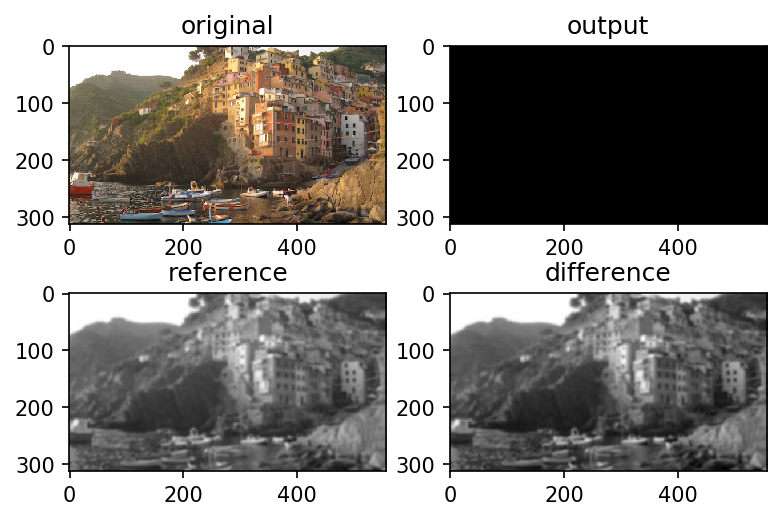

In [85]:
# plot output images
import matplotlib.pyplot as plt
_,ax = plt.subplots(2,2, dpi=150)

ax[0][0].imshow(plt.imread("../src/HW1/cinque_terre_small.jpg"))
ax[0][0].set_title("original")
ax[0][0].grid(False)

ax[0][1].imshow(plt.imread("HW2_output.png"))
ax[0][1].set_title("output")
ax[0][1].grid(False)

ax[1][0].imshow(plt.imread("HW2_reference.png"))
ax[1][0].set_title("reference")
ax[1][0].grid(False)

ax[1][1].imshow(plt.imread("HW2_differenceImage.png"))
ax[1][1].set_title("difference")
ax[1][1].grid(False)

plt.show()